In [1]:
!pip install fastbook

In [2]:
from fastai.vision.all import *
import pickle

import const
import train_class

# For vastai, we'll get data from root
const.SUBDIR_DATA_CLASS = "./"
# We'll dump models and preds into class/ and neg/
Path('class').mkdir()
Path('neg').mkdir()
const.SUBDIR_MODELS_CLASS = "class/"
const.SUBDIR_PREDS_CLASS = "class/"
const.SUBDIR_MODELS_NEG = "neg/"
const.SUBDIR_PREDS_NEG = "neg/"

"""
vastai prep:
- pip install fastai[all]
"""

'\nvastai prep:\n- pip install fastai[all]\n'

In [ ]:
# LEARN CLASS #

In [3]:
IMAGE_PATH = "png224"
MODEL_NAME = "resnet18"

In [4]:
dls = train_class.get_dls(image_path=IMAGE_PATH, is_neg=False)

In [5]:
len(dls.train.items), len(dls.valid.items)

(4432, 1902)

In [6]:
dls.vocab

['atyp', 'ind', 'neg', 'typ']

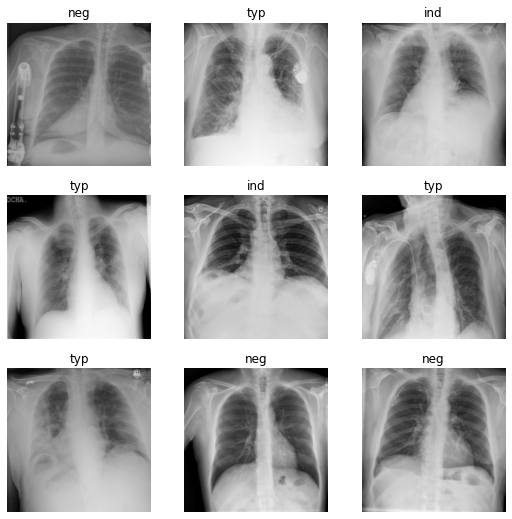

In [7]:
dls.show_batch()

In [11]:
learn = train_class.get_learn(dls=dls, model_name=MODEL_NAME, is_neg=False)

/opt/conda/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=tensor(3.0200e-05))

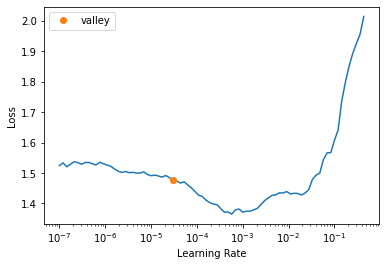

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(5, 3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.275570,1.190058,0.523659,00:08
1,1.117778,1.098569,0.578864,00:08
2,1.011495,1.076283,0.603049,00:08
3,0.926172,1.067784,0.599895,00:08
4,0.895964,1.066377,0.597266,00:08


In [15]:
train_class.save_learn(learn=learn, model_name=MODEL_NAME, is_neg=False)

In [27]:
preds_train, targs_train = train_class.predict_and_save(learn=learn, sname="train", model_name=MODEL_NAME, is_neg=False)
preds_valid, targs_valid = train_class.predict_and_save(learn=learn, sname="valid", model_name=MODEL_NAME, is_neg=False)

In [28]:
preds_train.shape, preds_valid.shape

(torch.Size([4432, 4]), torch.Size([1902, 4]))

In [29]:
accuracy(preds_valid, targs_valid)

TensorBase(0.6362)

In [ ]:
# Analyze errors

In [30]:
train_class.analyze_accuracy_by_category(dls=dls, preds=preds_valid, targs=targs_valid)

,mean,count,lab
act,,,
0,0.027586,145,atyp
1,0.093093,333,ind
2,0.819578,521,neg
3,0.828350,903,typ


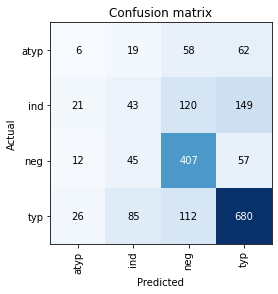

In [31]:
train_class.confusion_matrix(learn=learn)

In [32]:
# LEARN NEG #

In [3]:
NEG_IMAGE_PATH = "png224"
NEG_MODEL_NAME = "resnet18"

In [4]:
neg_dls = train_class.get_dls(image_path=NEG_IMAGE_PATH, is_neg=True)

In [5]:
neg_dls.vocab

['negative', 'positive']

In [7]:
neg_learn = train_class.get_learn(dls=neg_dls, model_name=NEG_MODEL_NAME, is_neg=True)

/opt/conda/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=tensor(3.6308e-05))

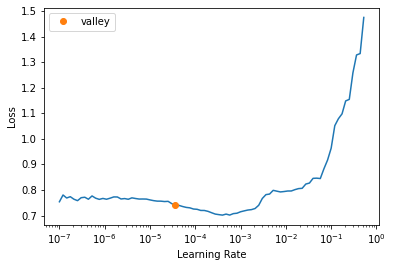

In [8]:
neg_learn.lr_find()

In [9]:
neg_learn.fit_one_cycle(5, 3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.632248,0.560509,0.715037,00:08
1,0.552357,0.487986,0.783912,00:08
2,0.490943,0.490587,0.799685,00:08
3,0.449752,0.494371,0.801788,00:08
4,0.425692,0.483062,0.807571,00:09


In [10]:
train_class.save_learn(learn=neg_learn, model_name=NEG_MODEL_NAME, is_neg=True)

In [12]:
neg_preds_train, neg_targs_train = train_class.predict_and_save(learn=neg_learn, sname="train", model_name=NEG_MODEL_NAME, is_neg=True)
neg_preds_valid, neg_targs_valid = train_class.predict_and_save(learn=neg_learn, sname="valid", model_name=NEG_MODEL_NAME, is_neg=True)

In [13]:
neg_preds_train.shape, neg_preds_valid.shape

(torch.Size([4432, 2]), torch.Size([1902, 2]))

In [14]:
accuracy(neg_preds_valid, neg_targs_valid)

TensorBase(0.8144)

In [15]:
train_class.analyze_accuracy_by_category(dls=neg_dls, preds=neg_preds_valid, targs=neg_targs_valid)

,mean,count,lab
act,,,
0,0.761996,521,negative
1,0.834178,1381,positive


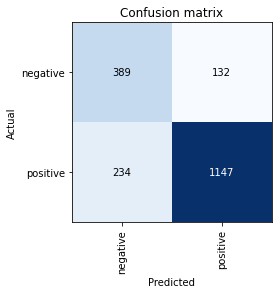

In [16]:
train_class.confusion_matrix(learn=neg_learn)